In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
vpd = pd.read_csv('vpd.csv',encoding= 'unicode_escape')
# col = vpd_1['NPD_WELL_BORE_NAME']

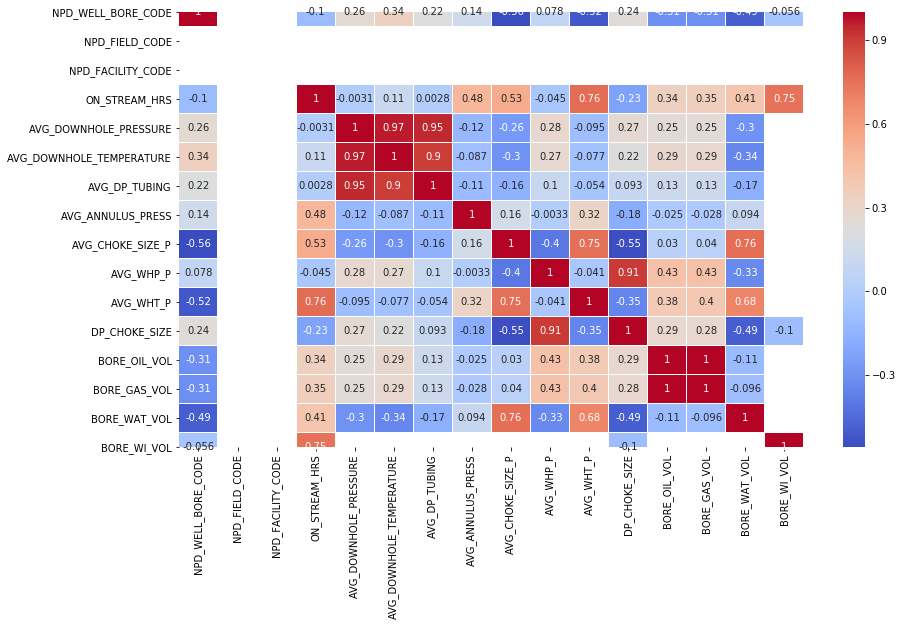

In [2]:
plt.figure(figsize=(14,8))
sns.heatmap(vpd.corr(), annot = True, cmap='coolwarm',linewidths=.1) 
#After observing below matrix we observe the our dependent varible is not/least related with fbs, chol, trestbps, restecg as they lies between [0.2, -0.2].
#So, we can remove those varible from the dataset

In [65]:
 #Training set x and y Well 1,2,3
x = vpd.iloc[:4968,8:22]
x = x.drop(['BORE_OIL_VOL'],axis=1)
x = x.drop(['AVG_CHOKE_UOM'],axis=1)
x = x.drop(['BORE_WI_VOL'],axis=1)
x = x.drop(['BORE_WAT_VOL'],axis=1)
x = x.drop(['AVG_CHOKE_SIZE_P'],axis=1)
x = x.drop(['AVG_ANNULUS_PRESS'],axis=1)
x = x.drop(['BORE_GAS_VOL'],axis=1)
y = vpd.iloc[:4968,18] # y train - oil volume production
# Test Set = a and b Well 4
a = vpd.iloc[4969:8023,8:22]
a = a.drop(['BORE_OIL_VOL'],axis=1)
a = a.drop(['AVG_CHOKE_UOM'],axis=1)
a = a.drop(['BORE_WI_VOL'],axis=1)
a = a.drop(['BORE_WAT_VOL'],axis=1)
a = a.drop(['AVG_CHOKE_SIZE_P'],axis=1)
a = a.drop(['AVG_ANNULUS_PRESS'],axis=1)
a = a.drop(['BORE_GAS_VOL'],axis=1)
b = vpd.iloc[4969:8023,18]

In [66]:
#Training Features
x

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE
0,0.0,0.000,0.000,0.000,0.000,0.00,0.000
1,0.0,NaN,NaN,NaN,0.000,0.00,0.000
2,0.0,NaN,NaN,NaN,0.000,0.00,0.000
3,0.0,NaN,NaN,NaN,0.000,0.00,0.000
4,0.0,310.376,96.876,277.278,33.098,10.48,33.072
...,...,...,...,...,...,...,...
4963,0.0,0.000,0.000,0.000,0.000,0.00,0.016
4964,0.0,0.000,0.000,0.000,0.000,0.00,0.024
4965,0.0,0.000,0.000,0.000,0.000,0.00,0.025
4966,0.0,0.000,0.000,0.000,0.000,0.00,0.026


In [67]:
#Training Labels
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4963    0.0
4964    0.0
4965    0.0
4966    0.0
4967    0.0
Name: BORE_OIL_VOL, Length: 4968, dtype: float64

In [68]:
#Filling missing values with mean

x.fillna(x.mean(), inplace=True)

In [69]:
x.cov()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE
ON_STREAM_HRS,65.501776,-87.165973,-7.360950,-67.486857,-32.868461,164.599122,-72.100844
AVG_DOWNHOLE_PRESSURE,-87.165973,15197.272145,6360.644640,9271.407202,1410.714164,-936.000222,1429.842555
AVG_DOWNHOLE_TEMPERATURE,-7.360950,6360.644640,2736.353866,3885.713478,538.961123,-336.244765,530.455776
AVG_DP_TUBING,-67.486857,9271.407202,3885.713478,6129.371926,712.171019,-592.824245,765.354688
AVG_WHP_P,-32.868461,1410.714164,538.961123,712.171019,641.397102,-168.046094,574.061345
AVG_WHT_P,164.599122,-936.000222,-336.244765,-592.824245,-168.046094,588.330341,-291.490643
DP_CHOKE_SIZE,-72.100844,1429.842555,530.455776,765.354688,574.061345,-291.490643,569.193021


In [70]:
x =pd.DataFrame(x)
y =pd.DataFrame(y)


a =pd.DataFrame(a)
b =pd.DataFrame(b)

In [71]:
a.fillna(a.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
b.fillna(b.mean(), inplace=True)

In [72]:
x_train = x
y_train = y
x_test = a
y_test = b


In [90]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train.values.ravel())

y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,recall_score
print("\nAccuracy score: %f"%(accuracy_score(y_test,y_pred)*100))


C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Accuracy score: 10.740013


In [73]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
minmax.fit(x).transform(x)
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [74]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()

In [75]:
reg_all.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred = reg_all.predict(x_test)

In [77]:
reg_all.score(x_test, y_test)

0.12012034209293544

In [78]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(reg_all, x, y, cv=5)

print(cv_results)

np.mean(cv_results)

[-13.63521564  -1.87079298  -2.29186364  -1.60003232 -10.29587097]


-5.93875511076825

In [79]:
# Applying Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(x_train, y_train)

ridge_pred = ridge.predict(x_test)

ridge.score(x_test, y_test)

0.09331688985067677

In [92]:
y_pred.shape

(3054,)

In [81]:
y_test


,BORE_OIL_VOL
4969,0.0
4970,0.0
4971,0.0
4972,0.0
4973,0.0
...,...
8018,0.0
8019,0.0
8020,0.0
8021,0.0


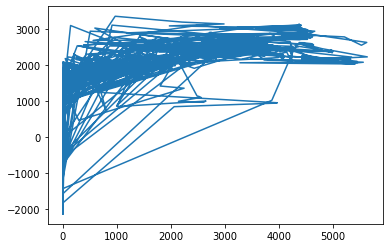

In [82]:
plt.plot(y_test,y_pred)

In [83]:
vpd.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,M®RSK INSPIRER,0.0,0.000,...,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,M®RSK INSPIRER,0.0,NaN,...,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,M®RSK INSPIRER,0.0,NaN,...,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,M®RSK INSPIRER,0.0,NaN,...,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,M®RSK INSPIRER,0.0,310.376,...,%,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production,OP


In [84]:
DATEE = vpd.iloc[4969:8023,0]

In [91]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
a = pd.to_datetime(DATEE)

In [86]:
a

4969   2008-02-14
4970   2008-02-15
4971   2008-02-16
4972   2008-02-17
4973   2008-02-18
          ...    
8018   2016-09-13
8019   2016-09-14
8020   2016-09-15
8021   2016-09-16
8022   2016-09-17
Name: DATEPRD, Length: 3054, dtype: datetime64[ns]

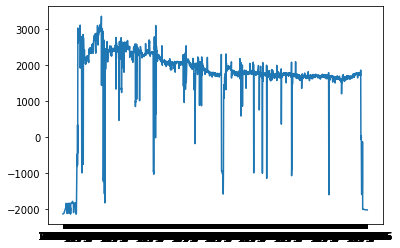

In [87]:
plt.plot(DATEE,y_pred)

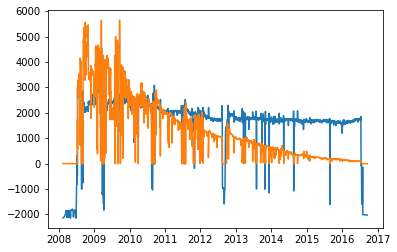

In [88]:
plt.plot(a,y_pred)
plt.plot(a,y_test)

In [89]:
print("linear model intercept (b): {}".format(reg_all.intercept_))
print("linear model coeff(w): {}".format(reg_all.coef_))

linear model intercept (b): [-2136.99431701]
linear model coeff(w): [[-14.67418675   4.49880338   9.57093829  -5.83856453   8.44300677
   35.56045884   9.29278723]]
